# CO Data Aggregation Temporal Fluctuation

Observes how CO data aggregated to hexagon grid cells fluctuates up to 30 hours into the future.

To convert from mol/m<sup>2</sup> to molecules/cm<sup>2</sup>, multiply by 6.022140857e+19 (6.022140857 * 10<sup>19</sup>).

# Environment Setup

In [26]:
# Load Notebook formatter
%load_ext nb_black
# %reload_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [27]:
# Import packages
import os
from datetime import timedelta
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.interpolate import UnivariateSpline
import seaborn as sns
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import radiance as rd
import sentinel as stl

<IPython.core.display.Javascript object>

In [28]:
# Set Options
np.set_printoptions(precision=15)
np.set_printoptions(suppress=True)
# sns.set(font_scale=1.5, style="whitegrid")
sns.set(font_scale=1.5)
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
pd.set_option("precision", 15)
register_matplotlib_converters()

<IPython.core.display.Javascript object>

In [29]:
# Set working directory
os.chdir("..")
print(f"Working directory: {os.getcwd()}")

Working directory: C:\PSU\08-covid19-remote-sensing-fusion\00-git-repos\sentinel-5p-no2


<IPython.core.display.Javascript object>

# User-Defined Variables

In [30]:
# Set paths to time series geopackage
hexagon_grid_time_series_path = os.path.join(
    "03-processed-data",
    "vector",
    "south-korea",
    "co_aggregate_daily_hexagon_grid_jul_2018_dec_2020.gpkg",
)

<IPython.core.display.Javascript object>

# Data Acquisition and Preprocessing

In [31]:
# Get cleaned time series data into dataframe
time_series_df = stl.clean_time_series(hexagon_grid_time_series_path)

<IPython.core.display.Javascript object>

In [32]:
# Check dataframe
time_series_df.head()

,A-24,B-24,C-24,D-24,E-24,F-24,G-24,H-24,I-24,J-24,K-24,L-24,M-24,N-24,O-24,P-24,Q-24,R-24,S-24,T-24,U-24,V-24,W-24,X-24,Y-24,Z-24,AA-24,AB-24,AC-24,A-23,B-23,C-23,D-23,E-23,F-23,G-23,H-23,I-23,J-23,K-23,L-23,M-23,N-23,O-23,P-23,Q-23,R-23,S-23,T-23,U-23,V-23,W-23,X-23,Y-23,Z-23,AA-23,AB-23,AC-23,A-22,B-22,C-22,D-22,E-22,F-22,G-22,H-22,I-22,J-22,K-22,L-22,M-22,N-22,O-22,P-22,Q-22,R-22,S-22,T-22,U-22,V-22,W-22,X-22,Y-22,Z-22,AA-22,AB-22,AC-22,A-21,B-21,C-21,D-21,E-21,F-21,G-21,H-21,I-21,J-21,K-21,L-21,M-21,N-21,O-21,P-21,Q-21,R-21,S-21,T-21,U-21,V-21,W-21,X-21,Y-21,Z-21,AA-21,AB-21,AC-21,A-20,B-20,C-20,D-20,E-20,F-20,G-20,H-20,I-20,J-20,K-20,L-20,M-20,N-20,O-20,P-20,Q-20,R-20,S-20,T-20,U-20,V-20,W-20,X-20,Y-20,Z-20,AA-20,AB-20,AC-20,A-19,B-19,C-19,D-19,E-19,F-19,G-19,H-19,I-19,J-19,K-19,L-19,M-19,N-19,O-19,P-19,Q-19,R-19,S-19,T-19,U-19,V-19,W-19,X-19,Y-19,Z-19,AA-19,AB-19,AC-19,A-18,B-18,C-18,D-18,E-18,F-18,G-18,H-18,I-18,J-18,K-18,L-18,M-18,N-18,O-18,P-18,Q-18,R-18,S-18,T-18,U-18,V-18,W-18,X-18,Y-18,Z-18,AA-18,AB-18,AC-18,A-17,B-17,C-17,D-17,E-17,F-17,G-17,H-17,I-17,J-17,K-17,L-17,M-17,N-17,O-17,P-17,Q-17,R-17,S-17,T-17,U-17,V-17,W-17,X-17,Y-17,Z-17,AA-17,AB-17,AC-17,A-16,B-16,C-16,D-16,E-16,F-16,G-16,H-16,I-16,J-16,K-16,L-16,M-16,N-16,O-16,P-16,Q-16,R-16,S-16,T-16,U-16,V-16,W-16,X-16,Y-16,Z-16,AA-16,AB-16,AC-16,A-15,B-15,C-15,D-15,E-15,F-15,G-15,H-15,I-15,J-15,K-15,L-15,M-15,N-15,O-15,P-15,Q-15,R-15,S-15,T-15,U-15,V-15,W-15,X-15,Y-15,Z-15,AA-15,AB-15,AC-15,A-14,B-14,C-14,D-14,E-14,F-14,G-14,H-14,I-14,J-14,K-14,L-14,M-14,N-14,O-14,P-14,Q-14,R-14,S-14,T-14,U-14,V-14,W-14,X-14,Y-14,Z-14,AA-14,AB-14,AC-14,A-13,B-13,C-13,D-13,E-13,F-13,G-13,H-13,I-13,J-13,K-13,L-13,M-13,N-13,O-13,P-13,Q-13,R-13,S-13,T-13,U-13,V-13,W-13,X-13,Y-13,Z-13,AA-13,AB-13,AC-13,A-12,B-12,C-12,D-12,E-12,F-12,G-12,H-12,I-12,J-12,K-12,L-12,M-12,N-12,O-12,P-12,Q-12,R-12,S-12,T-12,U-12,V-12,W-12,X-12,Y-12,Z-12,AA-12,AB-12,AC-12,A-11,B-11,C-11,D-11,E-11,F-11,G-11,H-11,I-11,J-11,K-11,L-11,M-11,N-11,O-11,P-11,Q-11,R-11,S-11,T-11,U-11,V-11,W-11,X-11,Y-11,Z-11,AA-11,AB-11,AC-11,A-10,B-10,C-10,D-10,E-10,F-10,G-10,H-10,I-10,J-10,K-10,L-10,M-10,N-10,O-10,P-10,Q-10,R-10,S-10,T-10,U-10,V-10,W-10,X-10,Y-10,Z-10,AA-10,AB-10,AC-10,A-9,B-9,C-9,D-9,E-9,F-9,G-9,H-9,I-9,J-9,K-9,L-9,M-9,N-9,O-9,P-9,Q-9,R-9,S-9,T-9,U-9,V-9,W-9,X-9,Y-9,Z-9,AA-9,AB-9,AC-9,A-8,B-8,C-8,D-8,E-8,F-8,G-8,H-8,I-8,J-8,K-8,L-8,M-8,N-8,O-8,P-8,Q-8,R-8,S-8,T-8,U-8,V-8,W-8,X-8,Y-8,Z-8,AA-8,AB-8,AC-8,A-7,B-7,C-7,D-7,E-7,F-7,G-7,H-7,I-7,J-7,K-7,L-7,M-7,N-7,O-7,P-7,Q-7,R-7,S-7,T-7,U-7,V-7,W-7,X-7,Y-7,Z-7,AA-7,AB-7,AC-7,A-6,B-6,C-6,D-6,E-6,F-6,G-6,H-6,I-6,J-6,K-6,L-6,M-6,N-6,O-6,P-6,Q-6,R-6,S-6,T-6,U-6,V-6,W-6,X-6,Y-6,Z-6,AA-6,AB-6,AC-6,A-5,B-5,C-5,D-5,E-5,F-5,G-5,H-5,I-5,J-5,K-5,L-5,M-5,N-5,O-5,P-5,Q-5,R-5,S-5,T-5,U-5,V-5,W-5,X-5,Y-5,Z-5,AA-5,AB-5,AC-5,A-4,B-4,C-4,D-4,E-4,F-4,G-4,H-4,I-4,J-4,K-4,L-4,M-4,N-4,O-4,P-4,Q-4,R-4,S-4,T-4,U-4,V-4,W-4,X-4,Y-4,Z-4,AA-4,AB-4,AC-4,A-3,B-3,C-3,D-3,E-3,F-3,G-3,H-3,I-3,J-3,K-3,L-3,M-3,N-3,O-3,P-3,Q-3,R-3,S-3,T-3,U-3,V-3,W-3,X-3,Y-3,Z-3,AA-3,AB-3,AC-3,A-2,B-2,C-2,D-2,E-2,F-2,G-2,H-2,I-2,J-2,K-2,L-2,M-2,N-2,O-2,P-2,Q-2,R-2,S-2,T-2,U-2,V-2,W-2,X-2,Y-2,Z-2,AA-2,AB-2,AC-2,A-1,B-1,C-1,D-1,E-1,F-1,G-1,H-1,I-1,J-1,K-1,L-1,M-1,N-1,O-1,P-1,Q-1,R-1,S-1,T-1,U-1,V-1,W-1,X-1,Y-1,Z-1,AA-1,AB-1,AC-1
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07

<IPython.core.display.Javascript object>

In [33]:
# Check dataframe
time_series_df.tail()

,A-24,B-24,C-24,D-24,E-24,F-24,G-24,H-24,I-24,J-24,K-24,L-24,M-24,N-24,O-24,P-24,Q-24,R-24,S-24,T-24,U-24,V-24,W-24,X-24,Y-24,Z-24,AA-24,AB-24,AC-24,A-23,B-23,C-23,D-23,E-23,F-23,G-23,H-23,I-23,J-23,K-23,L-23,M-23,N-23,O-23,P-23,Q-23,R-23,S-23,T-23,U-23,V-23,W-23,X-23,Y-23,Z-23,AA-23,AB-23,AC-23,A-22,B-22,C-22,D-22,E-22,F-22,G-22,H-22,I-22,J-22,K-22,L-22,M-22,N-22,O-22,P-22,Q-22,R-22,S-22,T-22,U-22,V-22,W-22,X-22,Y-22,Z-22,AA-22,AB-22,AC-22,A-21,B-21,C-21,D-21,E-21,F-21,G-21,H-21,I-21,J-21,K-21,L-21,M-21,N-21,O-21,P-21,Q-21,R-21,S-21,T-21,U-21,V-21,W-21,X-21,Y-21,Z-21,AA-21,AB-21,AC-21,A-20,B-20,C-20,D-20,E-20,F-20,G-20,H-20,I-20,J-20,K-20,L-20,M-20,N-20,O-20,P-20,Q-20,R-20,S-20,T-20,U-20,V-20,W-20,X-20,Y-20,Z-20,AA-20,AB-20,AC-20,A-19,B-19,C-19,D-19,E-19,F-19,G-19,H-19,I-19,J-19,K-19,L-19,M-19,N-19,O-19,P-19,Q-19,R-19,S-19,T-19,U-19,V-19,W-19,X-19,Y-19,Z-19,AA-19,AB-19,AC-19,A-18,B-18,C-18,D-18,E-18,F-18,G-18,H-18,I-18,J-18,K-18,L-18,M-18,N-18,O-18,P-18,Q-18,R-18,S-18,T-18,U-18,V-18,W-18,X-18,Y-18,Z-18,AA-18,AB-18,AC-18,A-17,B-17,C-17,D-17,E-17,F-17,G-17,H-17,I-17,J-17,K-17,L-17,M-17,N-17,O-17,P-17,Q-17,R-17,S-17,T-17,U-17,V-17,W-17,X-17,Y-17,Z-17,AA-17,AB-17,AC-17,A-16,B-16,C-16,D-16,E-16,F-16,G-16,H-16,I-16,J-16,K-16,L-16,M-16,N-16,O-16,P-16,Q-16,R-16,S-16,T-16,U-16,V-16,W-16,X-16,Y-16,Z-16,AA-16,AB-16,AC-16,A-15,B-15,C-15,D-15,E-15,F-15,G-15,H-15,I-15,J-15,K-15,L-15,M-15,N-15,O-15,P-15,Q-15,R-15,S-15,T-15,U-15,V-15,W-15,X-15,Y-15,Z-15,AA-15,AB-15,AC-15,A-14,B-14,C-14,D-14,E-14,F-14,G-14,H-14,I-14,J-14,K-14,L-14,M-14,N-14,O-14,P-14,Q-14,R-14,S-14,T-14,U-14,V-14,W-14,X-14,Y-14,Z-14,AA-14,AB-14,AC-14,A-13,B-13,C-13,D-13,E-13,F-13,G-13,H-13,I-13,J-13,K-13,L-13,M-13,N-13,O-13,P-13,Q-13,R-13,S-13,T-13,U-13,V-13,W-13,X-13,Y-13,Z-13,AA-13,AB-13,AC-13,A-12,B-12,C-12,D-12,E-12,F-12,G-12,H-12,I-12,J-12,K-12,L-12,M-12,N-12,O-12,P-12,Q-12,R-12,S-12,T-12,U-12,V-12,W-12,X-12,Y-12,Z-12,AA-12,AB-12,AC-12,A-11,B-11,C-11,D-11,E-11,F-11,G-11,H-11,I-11,J-11,K-11,L-11,M-11,N-11,O-11,P-11,Q-11,R-11,S-11,T-11,U-11,V-11,W-11,X-11,Y-11,Z-11,AA-11,AB-11,AC-11,A-10,B-10,C-10,D-10,E-10,F-10,G-10,H-10,I-10,J-10,K-10,L-10,M-10,N-10,O-10,P-10,Q-10,R-10,S-10,T-10,U-10,V-10,W-10,X-10,Y-10,Z-10,AA-10,AB-10,AC-10,A-9,B-9,C-9,D-9,E-9,F-9,G-9,H-9,I-9,J-9,K-9,L-9,M-9,N-9,O-9,P-9,Q-9,R-9,S-9,T-9,U-9,V-9,W-9,X-9,Y-9,Z-9,AA-9,AB-9,AC-9,A-8,B-8,C-8,D-8,E-8,F-8,G-8,H-8,I-8,J-8,K-8,L-8,M-8,N-8,O-8,P-8,Q-8,R-8,S-8,T-8,U-8,V-8,W-8,X-8,Y-8,Z-8,AA-8,AB-8,AC-8,A-7,B-7,C-7,D-7,E-7,F-7,G-7,H-7,I-7,J-7,K-7,L-7,M-7,N-7,O-7,P-7,Q-7,R-7,S-7,T-7,U-7,V-7,W-7,X-7,Y-7,Z-7,AA-7,AB-7,AC-7,A-6,B-6,C-6,D-6,E-6,F-6,G-6,H-6,I-6,J-6,K-6,L-6,M-6,N-6,O-6,P-6,Q-6,R-6,S-6,T-6,U-6,V-6,W-6,X-6,Y-6,Z-6,AA-6,AB-6,AC-6,A-5,B-5,C-5,D-5,E-5,F-5,G-5,H-5,I-5,J-5,K-5,L-5,M-5,N-5,O-5,P-5,Q-5,R-5,S-5,T-5,U-5,V-5,W-5,X-5,Y-5,Z-5,AA-5,AB-5,AC-5,A-4,B-4,C-4,D-4,E-4,F-4,G-4,H-4,I-4,J-4,K-4,L-4,M-4,N-4,O-4,P-4,Q-4,R-4,S-4,T-4,U-4,V-4,W-4,X-4,Y-4,Z-4,AA-4,AB-4,AC-4,A-3,B-3,C-3,D-3,E-3,F-3,G-3,H-3,I-3,J-3,K-3,L-3,M-3,N-3,O-3,P-3,Q-3,R-3,S-3,T-3,U-3,V-3,W-3,X-3,Y-3,Z-3,AA-3,AB-3,AC-3,A-2,B-2,C-2,D-2,E-2,F-2,G-2,H-2,I-2,J-2,K-2,L-2,M-2,N-2,O-2,P-2,Q-2,R-2,S-2,T-2,U-2,V-2,W-2,X-2,Y-2,Z-2,AA-2,AB-2,AC-2,A-1,B-1,C-1,D-1,E-1,F-1,G-1,H-1,I-1,J-1,K-1,L-1,M-1,N-1,O-1,P-1,Q-1,R-1,S-1,T-1,U-1,V-1,W-1,X-1,Y-1,Z-1,AA-1,AB-1,AC-1
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11

<IPython.core.display.Javascript object>

# Data Processing

## Timestamp and CO Deltas

### Seoul Area - High

#### Grid J-6

In [34]:
# Calculate time and CO deltas, grid J-6 - Raw values (not absolute magnitude)
(
    time_deltas_j6,
    co_deltas_magnitude_j6,
    co_deltas_percent_j6,
) = stl.calculate_deltas(
    time_series=time_series_df,
    grid_id="J-6",
    max_difference=30,
    return_absolute=False,
)

Calculated deltas for 710/1962 timestamp pairs within 30 hours.
Skipped calculations (NaN values) for 1252/1962 timestamp pairs within 30 hours.


<IPython.core.display.Javascript object>

In [35]:
# Check time deltas
time_deltas_j6[:10]

[Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:57'),
 Timedelta('1 days 01:22:27'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:55'),
 Timedelta('0 days 23:40:57'),
 Timedelta('1 days 01:22:27'),
 Timedelta('0 days 01:41:30')]

<IPython.core.display.Javascript object>

In [36]:
# Check CO deltas - magnitude
co_deltas_magnitude_j6[:10]

[-0.004019443739686771,
 0.0057935489875364475,
 -0.0006081386492222188,
 -0.0009706695615524924,
 0.0016289314296389149,
 0.007486052153315312,
 0.0008051685738296038,
 -0.005113145618326147,
 -0.0042127435470717366,
 0.0009004020712544102]

<IPython.core.display.Javascript object>

In [37]:
# Check CO deltas - percent
co_deltas_percent_j6[:10]

[-11.48753148132093,
 18.70686408769398,
 -1.6541811985475254,
 -2.6847013786537235,
 4.629629726689177,
 20.334880052777553,
 2.4411964082221393,
 -15.13315310119096,
 -12.468272533720821,
 3.1400725546544805]

<IPython.core.display.Javascript object>

In [38]:
# Convert deltas to arrays
time_deltas_j6_arr = stl.format_time_delta(time_deltas_j6)
co_deltas_magnitude_j6_arr = stl.format_no2_delta(co_deltas_magnitude_j6)
co_deltas_percent_j6_arr = stl.format_no2_delta(co_deltas_percent_j6)

<IPython.core.display.Javascript object>

In [39]:
# Check time delta array
time_deltas_j6_arr[:10]

array([23.6825           , 23.6825           , 23.6825           ,
       25.374166666666667, 23.6825           , 23.682222222222222,
       23.681944444444444, 23.6825           , 25.374166666666667,
        1.691666666666667])

<IPython.core.display.Javascript object>

In [40]:
# Check CO delta array - magnitude
co_deltas_magnitude_j6_arr[:10]

array([-0.004019443739687,  0.005793548987536, -0.000608138649222,
       -0.000970669561552,  0.001628931429639,  0.007486052153315,
        0.00080516857383 , -0.005113145618326, -0.004212743547072,
        0.000900402071254])

<IPython.core.display.Javascript object>

In [41]:
# Check CO delta array - percent
co_deltas_percent_j6_arr[:10]

array([-11.48753148132093 ,  18.70686408769398 ,  -1.654181198547525,
        -2.684701378653723,   4.629629726689177,  20.334880052777553,
         2.441196408222139, -15.13315310119096 , -12.468272533720821,
         3.140072554654481])

<IPython.core.display.Javascript object>

#### Grid I-6

In [42]:
# Calculate time and NO2 deltas, grid I-6 - Raw values (not absolute magnitude)
(
    time_deltas_i6,
    co_deltas_magnitude_i6,
    co_deltas_percent_i6,
) = stl.calculate_deltas(
    time_series=time_series_df,
    grid_id="I-6",
    max_difference=30,
    return_absolute=False,
)

Calculated deltas for 732/1962 timestamp pairs within 30 hours.
Skipped calculations (NaN values) for 1230/1962 timestamp pairs within 30 hours.


<IPython.core.display.Javascript object>

In [43]:
# Check time deltas
time_deltas_i6[:10]

[Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:57'),
 Timedelta('1 days 01:22:27'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:55'),
 Timedelta('0 days 23:40:57')]

<IPython.core.display.Javascript object>

In [44]:
# Check NO2 deltas - magnitude
co_deltas_magnitude_i6[:10]

[-0.002839200842038557,
 0.0015213155487062771,
 0.004254173224968967,
 0.00010435817194204972,
 0.0016100264859107705,
 0.0042748281187648535,
 -0.0046564618325642265,
 0.0012073942149140662,
 0.0017824003588626444,
 -0.004558484245197256]

<IPython.core.display.Javascript object>

In [45]:
# Check NO2 deltas - percent
co_deltas_percent_i6[:10]

[-8.159210127976488,
 4.7603150515757715,
 12.706758225691175,
 0.2765642886846449,
 4.255035749172331,
 10.836569198457887,
 -13.222495848704675,
 3.9509299292612656,
 5.610830109561898,
 -13.58732175613808]

<IPython.core.display.Javascript object>

In [46]:
# Convert deltas to arrays
time_deltas_i6_arr = stl.format_time_delta(time_deltas_i6)
co_deltas_magnitude_i6_arr = stl.format_no2_delta(co_deltas_magnitude_i6)
co_deltas_percent_i6_arr = stl.format_no2_delta(co_deltas_percent_i6)

<IPython.core.display.Javascript object>

In [47]:
# Check time delta array
time_deltas_i6_arr[:10]

array([23.6825           , 23.6825           , 23.6825           ,
       25.374166666666667, 23.6825           , 23.682222222222222,
       23.682222222222222, 23.6825           , 23.681944444444444,
       23.6825           ])

<IPython.core.display.Javascript object>

In [48]:
# Check NO2 delta array - magnitude
co_deltas_magnitude_i6_arr[:10]

array([-0.002839200842039,  0.001521315548706,  0.004254173224969,
        0.000104358171942,  0.001610026485911,  0.004274828118765,
       -0.004656461832564,  0.001207394214914,  0.001782400358863,
       -0.004558484245197])

<IPython.core.display.Javascript object>

In [49]:
# NO2 delta array - percent
co_deltas_percent_i6_arr[:10]

array([ -8.159210127976488,   4.760315051575772,  12.706758225691175,
         0.276564288684645,   4.255035749172331,  10.836569198457887,
       -13.222495848704675,   3.950929929261266,   5.610830109561898,
       -13.58732175613808 ])

<IPython.core.display.Javascript object>

### Rural Area to the East - Low

#### Grid S-9

In [50]:
# Calculate time and NO2 deltas, grid S-9 - Raw values (not absolute magnitude)
(
    time_deltas_s9,
    co_deltas_magnitude_s9,
    co_deltas_percent_s9,
) = stl.calculate_deltas(
    time_series=time_series_df,
    grid_id="S-9",
    max_difference=30,
    return_absolute=False,
)

Calculated deltas for 668/1962 timestamp pairs within 30 hours.
Skipped calculations (NaN values) for 1294/1962 timestamp pairs within 30 hours.


<IPython.core.display.Javascript object>

In [51]:
# Check time deltas
time_deltas_s9[:10]

[Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:55'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:56'),
 Timedelta('1 days 01:22:26'),
 Timedelta('0 days 01:41:30'),
 Timedelta('1 days 01:22:24')]

<IPython.core.display.Javascript object>

In [52]:
# Check NO2 deltas - magnitude
co_deltas_magnitude_s9[:10]

[-7.90533899643793e-05,
 0.0018325167260731384,
 -0.000924366816651815,
 -0.0006169153740518789,
 0.0006736096347538349,
 -0.004506022981656206,
 0.0018123746690463273,
 0.0014446259926966867,
 -0.00036774867634964056,
 -0.000285187335782814]

<IPython.core.display.Javascript object>

In [53]:
# Check NO2 deltas - percent
co_deltas_percent_s9[:10]

[-0.25780364074244677,
 5.370880078256937,
 -2.8882406832103142,
 -1.984919077316019,
 2.2112232899043853,
 -14.47168583764045,
 6.805558873705042,
 5.4246439280434355,
 -1.292924226251654,
 -1.002656540096411]

<IPython.core.display.Javascript object>

In [54]:
# Convert deltas to arrays
time_deltas_s9_arr = stl.format_time_delta(time_deltas_s9)
co_deltas_magnitude_s9_arr = stl.format_no2_delta(co_deltas_magnitude_s9)
co_deltas_percent_s9_arr = stl.format_no2_delta(co_deltas_percent_s9)

<IPython.core.display.Javascript object>

In [55]:
# Check time delta array
time_deltas_s9_arr[:10]

array([23.6825           , 23.682222222222222, 23.682222222222222,
       23.6825           , 23.681944444444444, 23.6825           ,
       23.682222222222222, 25.37388888888889 ,  1.691666666666667,
       25.373333333333335])

<IPython.core.display.Javascript object>

In [56]:
# Check NO2 delta array - magnitude
co_deltas_magnitude_s9_arr[:10]

array([-0.000079053389964,  0.001832516726073, -0.000924366816652,
       -0.000616915374052,  0.000673609634754, -0.004506022981656,
        0.001812374669046,  0.001444625992697, -0.00036774867635 ,
       -0.000285187335783])

<IPython.core.display.Javascript object>

In [57]:
# NO2 delta array - percent
co_deltas_percent_s9_arr[:10]

array([ -0.257803640742447,   5.370880078256937,  -2.888240683210314,
        -1.984919077316019,   2.211223289904385, -14.47168583764045 ,
         6.805558873705042,   5.424643928043436,  -1.292924226251654,
        -1.002656540096411])

<IPython.core.display.Javascript object>

### Southern Coast - High

#### Grid N-17

In [58]:
# Calculate time and NO2 deltas, grid N-17 - Raw values (not absolute magnitude)
(
    time_deltas_n17,
    co_deltas_magnitude_n17,
    co_deltas_percent_n17,
) = stl.calculate_deltas(
    time_series=time_series_df,
    grid_id="N-17",
    max_difference=30,
    return_absolute=False,
)

Calculated deltas for 592/1962 timestamp pairs within 30 hours.
Skipped calculations (NaN values) for 1370/1962 timestamp pairs within 30 hours.


<IPython.core.display.Javascript object>

In [59]:
# Check time deltas
time_deltas_n17[:10]

[Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:58'),
 Timedelta('1 days 01:22:26'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:55'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:56')]

<IPython.core.display.Javascript object>

In [60]:
# Check NO2 deltas - magnitude
co_deltas_magnitude_n17[:10]

[0.0055567614534867416,
 -0.004984355184218088,
 -0.005327304376138972,
 0.0006621663416065127,
 0.0013375148302276346,
 0.003521660662881683,
 0.0065329011575214965,
 0.009753606751653203,
 -0.016044244124616136,
 0.001339118147618043]

<IPython.core.display.Javascript object>

In [61]:
# Check NO2 deltas - percent
co_deltas_percent_n17[:10]

[15.705946090922199,
 -12.175748080014813,
 -14.817663332850827,
 2.1621696375006207,
 4.274951200611185,
 10.794438750430045,
 18.073434340848372,
 22.853232836452143,
 -30.599552481921773,
 3.680039143621614]

<IPython.core.display.Javascript object>

In [62]:
# Convert deltas to arrays
time_deltas_n17_arr = stl.format_time_delta(time_deltas_n17)
co_deltas_magnitude_n17_arr = stl.format_no2_delta(co_deltas_magnitude_n17)
co_deltas_percent_n17_arr = stl.format_no2_delta(co_deltas_percent_n17)

<IPython.core.display.Javascript object>

In [63]:
# Check time delta array
time_deltas_n17_arr[:10]

array([23.682222222222222, 23.682222222222222, 23.682777777777776,
       25.37388888888889 , 23.682222222222222, 23.682222222222222,
       23.6825           , 23.681944444444444, 23.6825           ,
       23.682222222222222])

<IPython.core.display.Javascript object>

In [64]:
# Check NO2 delta array - magnitude
co_deltas_magnitude_n17_arr[:10]

array([ 0.005556761453487, -0.004984355184218, -0.005327304376139,
        0.000662166341607,  0.001337514830228,  0.003521660662882,
        0.006532901157521,  0.009753606751653, -0.016044244124616,
        0.001339118147618])

<IPython.core.display.Javascript object>

In [65]:
# NO2 delta array - percent
co_deltas_percent_n17_arr[:10]

array([ 15.705946090922199, -12.175748080014813, -14.817663332850827,
         2.162169637500621,   4.274951200611185,  10.794438750430045,
        18.073434340848372,  22.853232836452143, -30.599552481921773,
         3.680039143621614])

<IPython.core.display.Javascript object>

Get means and standard deviations for all grid cells over the time series (exclude NaN). Plot std vs mean scatter plot to get a sense of the values.

### Rural Area in the Center

#### Grid N-11

In [66]:
# Calculate time and NO2 deltas, grid N-11 - Raw values (not absolute magnitude)
(
    time_deltas_n11,
    co_deltas_magnitude_n11,
    co_deltas_percent_n11,
) = stl.calculate_deltas(
    time_series=time_series_df,
    grid_id="N-11",
    max_difference=30,
    return_absolute=False,
)

Calculated deltas for 669/1962 timestamp pairs within 30 hours.
Skipped calculations (NaN values) for 1293/1962 timestamp pairs within 30 hours.


<IPython.core.display.Javascript object>

In [67]:
# Check time deltas
time_deltas_n11[:10]

[Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:56'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:55'),
 Timedelta('0 days 23:40:57'),
 Timedelta('0 days 23:40:56'),
 Timedelta('1 days 01:22:26')]

<IPython.core.display.Javascript object>

In [68]:
# Check NO2 deltas - magnitude
co_deltas_magnitude_n11[:10]

[0.009023525352248523,
 -0.0006921506553599008,
 0.005845445455715206,
 -0.0020262585027697594,
 -0.002303908953525405,
 -0.0011326246967462011,
 0.00017601625453680936,
 0.0013329717455716865,
 -0.004508052197919457,
 -0.0015164217094902795]

<IPython.core.display.Javascript object>

In [69]:
# Check NO2 deltas - percent
co_deltas_percent_n11[:10]

[36.245886331542266,
 -2.040608621671143,
 17.68826796204112,
 -5.931170968818758,
 -7.169108731539713,
 -3.7965870471173826,
 0.6132952914541288,
 4.61617671243745,
 -14.922843123653687,
 -5.019756268676304]

<IPython.core.display.Javascript object>

In [70]:
# Convert deltas to arrays
time_deltas_n11_arr = stl.format_time_delta(time_deltas_n11)
co_deltas_magnitude_n11_arr = stl.format_no2_delta(co_deltas_magnitude_n11)
co_deltas_percent_n11_arr = stl.format_no2_delta(co_deltas_percent_n11)

<IPython.core.display.Javascript object>

In [71]:
# Check time delta array
time_deltas_n11_arr[:10]

array([23.6825           , 23.6825           , 23.682222222222222,
       23.682222222222222, 23.682222222222222, 23.6825           ,
       23.681944444444444, 23.6825           , 23.682222222222222,
       25.37388888888889 ])

<IPython.core.display.Javascript object>

In [72]:
# Check NO2 delta array - magnitude
co_deltas_magnitude_n11_arr[:10]

array([ 0.009023525352249, -0.00069215065536 ,  0.005845445455715,
       -0.00202625850277 , -0.002303908953525, -0.001132624696746,
        0.000176016254537,  0.001332971745572, -0.004508052197919,
       -0.00151642170949 ])

<IPython.core.display.Javascript object>

In [73]:
# NO2 delta array - percent
co_deltas_percent_n11_arr[:10]

array([ 36.245886331542266,  -2.040608621671143,  17.68826796204112 ,
        -5.931170968818758,  -7.169108731539713,  -3.796587047117383,
         0.613295291454129,   4.61617671243745 , -14.922843123653687,
        -5.019756268676304])

<IPython.core.display.Javascript object>

## Standard Deviation vs. Mean

### 2018

In [74]:
# Slice time series to 2018
time_series_2018 = time_series_df["2018-07-01":"2018-12-31"]

<IPython.core.display.Javascript object>

#### All Grid Cells

In [75]:
# Get means and standard deviations for all grid cells
means_2018 = np.array(
    [
        stl.extract_grid_statistic(time_series_2018, grid_id, "mean")
        for grid_id in time_series_2018.columns
    ]
)

standard_deviations_2018 = np.array(
    [
        stl.extract_grid_statistic(time_series_2018, grid_id, "std")
        for grid_id in time_series_2018.columns
    ]
)

<IPython.core.display.Javascript object>

#### Subset Regions

### 2019

In [76]:
# Slice time series to 2019
time_series_2019 = time_series_df["2019-01-01":"2019-12-31"]

<IPython.core.display.Javascript object>

#### All Grid Cells

In [77]:
# Get means and standard deviations for all grid cells
means_2019 = np.array(
    [
        stl.extract_grid_statistic(time_series_2019, grid_id, "mean")
        for grid_id in time_series_2019.columns
    ]
)

standard_deviations_2019 = np.array(
    [
        stl.extract_grid_statistic(time_series_2019, grid_id, "std")
        for grid_id in time_series_2019.columns
    ]
)

<IPython.core.display.Javascript object>

#### Subset Regions

### 2020

In [78]:
# Slice time series to 2020
time_series_2020 = time_series_df["2020-01-01":"2020-11-16"]

<IPython.core.display.Javascript object>

#### All Grid Cells

In [79]:
# Get means and standard deviations for all grid cells
means_2020 = np.array(
    [
        stl.extract_grid_statistic(time_series_2020, grid_id, "mean")
        for grid_id in time_series_2020.columns
    ]
)

standard_deviations_2020 = np.array(
    [
        stl.extract_grid_statistic(time_series_2020, grid_id, "std")
        for grid_id in time_series_2020.columns
    ]
)

<IPython.core.display.Javascript object>

#### Subset Regions

### 2018-2020

#### All Grid Cells

In [80]:
# Get means and standard deviations for all grid cells
means = np.array(
    [
        stl.extract_grid_statistic(time_series_df, grid_id, "mean")
        for grid_id in time_series_df.columns
    ]
)

standard_deviations = np.array(
    [
        stl.extract_grid_statistic(time_series_df, grid_id, "std")
        for grid_id in time_series_df.columns
    ]
)

<IPython.core.display.Javascript object>

#### Subset Regions

##### Seoul Area

In [81]:
# Slice dataframes to subset region grid cells
subset_1_seoul = time_series_df[
    [
        "H-6",
        "H-7",
        "I-5",
        "I-6",
        "I-7",
        "J-5",
        "J-6",
        "J-7",
        "J-8",
        "K-5",
        "K-6",
        "K-7",
        "L-6",
        "L-7",
    ]
]

<IPython.core.display.Javascript object>

In [82]:
# Calculate subset region means and standard deviations
means_subset_1 = np.array(
    [
        stl.extract_grid_statistic(subset_1_seoul, grid_id, "mean")
        for grid_id in subset_1_seoul.columns
    ]
)

standard_deviations_subset_1 = np.array(
    [
        stl.extract_grid_statistic(subset_1_seoul, grid_id, "std")
        for grid_id in subset_1_seoul.columns
    ]
)

<IPython.core.display.Javascript object>

In [83]:
# Set annotations (optional for plotting)
subset_1_seoul_annotations = subset_1_seoul.columns.tolist()

<IPython.core.display.Javascript object>

##### Southern Coast

In [84]:
# Slice dataframes to subset region grid cells
subset_2_south = time_series_df[
    ["M-16", "M-17", "N-16", "N-17", "N-18", "O-16", "O-17",]
]

<IPython.core.display.Javascript object>

In [85]:
# Calculate subset region means and standard deviations
means_subset_2 = np.array(
    [
        stl.extract_grid_statistic(subset_2_south, grid_id, "mean")
        for grid_id in subset_2_south.columns
    ]
)

standard_deviations_subset_2 = np.array(
    [
        stl.extract_grid_statistic(subset_2_south, grid_id, "std")
        for grid_id in subset_2_south.columns
    ]
)

<IPython.core.display.Javascript object>

In [86]:
# Set annotations (optional for plotting)
subset_2_south_annotations = subset_2_south.columns.tolist()

<IPython.core.display.Javascript object>

##### Rural Area to the East

In [87]:
# Slice dataframes to subset region grid cells
subset_3_east = time_series_df[
    ["S-8", "S-9", "T-8", "T-9", "T-10", "U-8", "U-9",]
]

<IPython.core.display.Javascript object>

In [88]:
# Calculate subset region means and standard deviations
means_subset_3 = np.array(
    [
        stl.extract_grid_statistic(subset_3_east, grid_id, "mean")
        for grid_id in subset_3_east.columns
    ]
)

standard_deviations_subset_3 = np.array(
    [
        stl.extract_grid_statistic(subset_3_east, grid_id, "std")
        for grid_id in subset_3_east.columns
    ]
)

<IPython.core.display.Javascript object>

In [89]:
# Set annotations (optional for plotting)
subset_3_east_annotations = subset_3_east.columns.tolist()

<IPython.core.display.Javascript object>

##### Rural Area in the Center

In [90]:
# Slice dataframes to subset region grid cells
subset_4_central = time_series_df[
    ["M-10", "M-11", "N-10", "N-11", "N-12", "O-10", "O-11",]
]

<IPython.core.display.Javascript object>

In [91]:
# Calculate subset region means and standard deviations
means_subset_4 = np.array(
    [
        stl.extract_grid_statistic(subset_4_central, grid_id, "mean")
        for grid_id in subset_4_central.columns
    ]
)

standard_deviations_subset_4 = np.array(
    [
        stl.extract_grid_statistic(subset_4_central, grid_id, "std")
        for grid_id in subset_4_central.columns
    ]
)

<IPython.core.display.Javascript object>

In [92]:
# Set annotations (optional for plotting)
subset_4_central_annotations = subset_4_central.columns.tolist()

<IPython.core.display.Javascript object>

# Data Post-Processing

# Data Visualization

## CO Delta Plots

**TO DO:** Get means and standard deviations for all grid cells over the time series (exclude NaN). Plot std vs mean scatter plot to get a sense of the values.

### Seoul Area - High

#### Grid J-6

Common time differences for J-6 (hours):

* 1.7
* 22.0
* 23.7
* 25.4

In [93]:
# Get unique values for time deltas, rounded to 1 decimal place
unique_time_deltas = np.unique(
    [round(value, 1) for value in np.unique(time_deltas_i6_arr)]
)
unique_time_deltas

array([ 1.7, 22. , 23.7, 25.4])

<IPython.core.display.Javascript object>

Saved plot: co-deltas-magnitude-percent-grid-j6.png


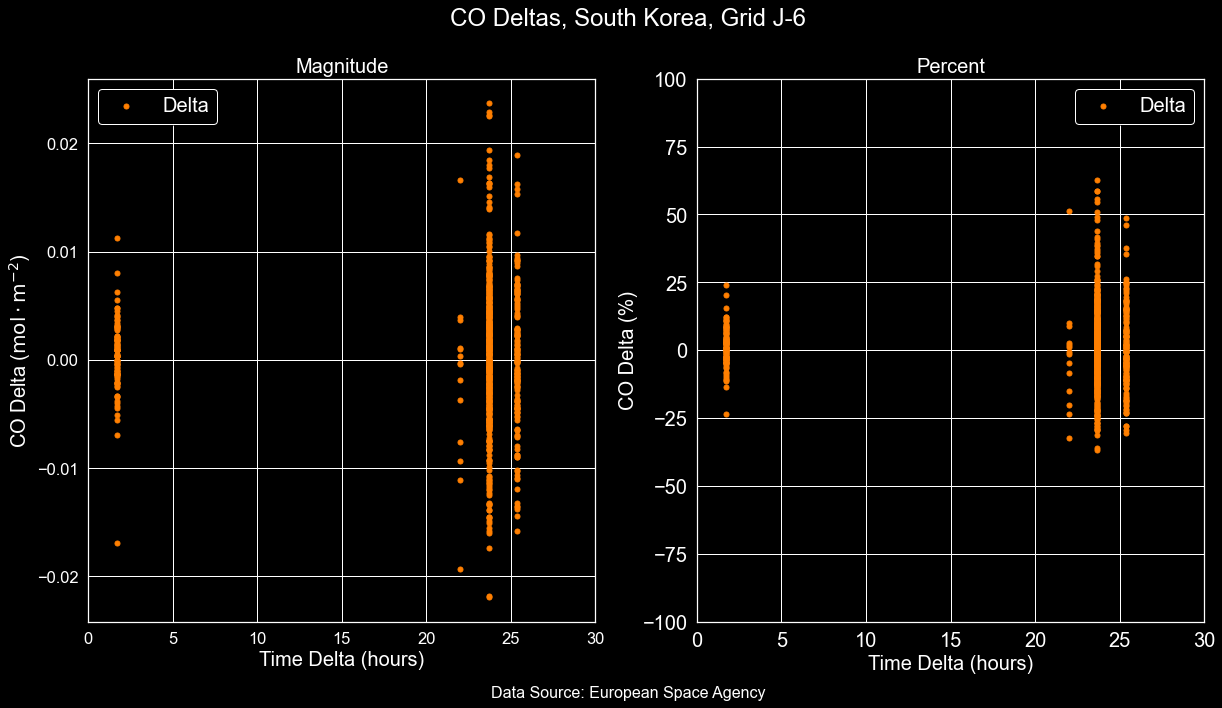

<IPython.core.display.Javascript object>

In [102]:
# Plot deltas
grid_cell = "J-6"
fig, ax = stl.plot_deltas(
    time_delta=time_deltas_j6_arr,
    no2_delta_magnitude=co_deltas_magnitude_j6_arr,
    no2_delta_percent=co_deltas_percent_j6_arr,
    grid_id=grid_cell,
    product_type="CO",
    #     y_min_magnitude=-1,
    #     y_max_magnitude=1,
    #     x_max=5,
    y_min_percent=-100,
    y_max_percent=100,
    y_label_magnitude=r"CO Delta ($\mathrm{mol \cdot m^{-2}}$)",
    y_label_percent="CO Delta (%)",
)

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "time-series",
        "south-korea",
        "carbon-monoxide",
        "deltas",
        f"co-deltas-magnitude-percent-grid-{grid_cell.lower().replace('-', '')}.png",
    )
)

#### Grid I-6

Saved plot: co-deltas-magnitude-percent-grid-i6.png


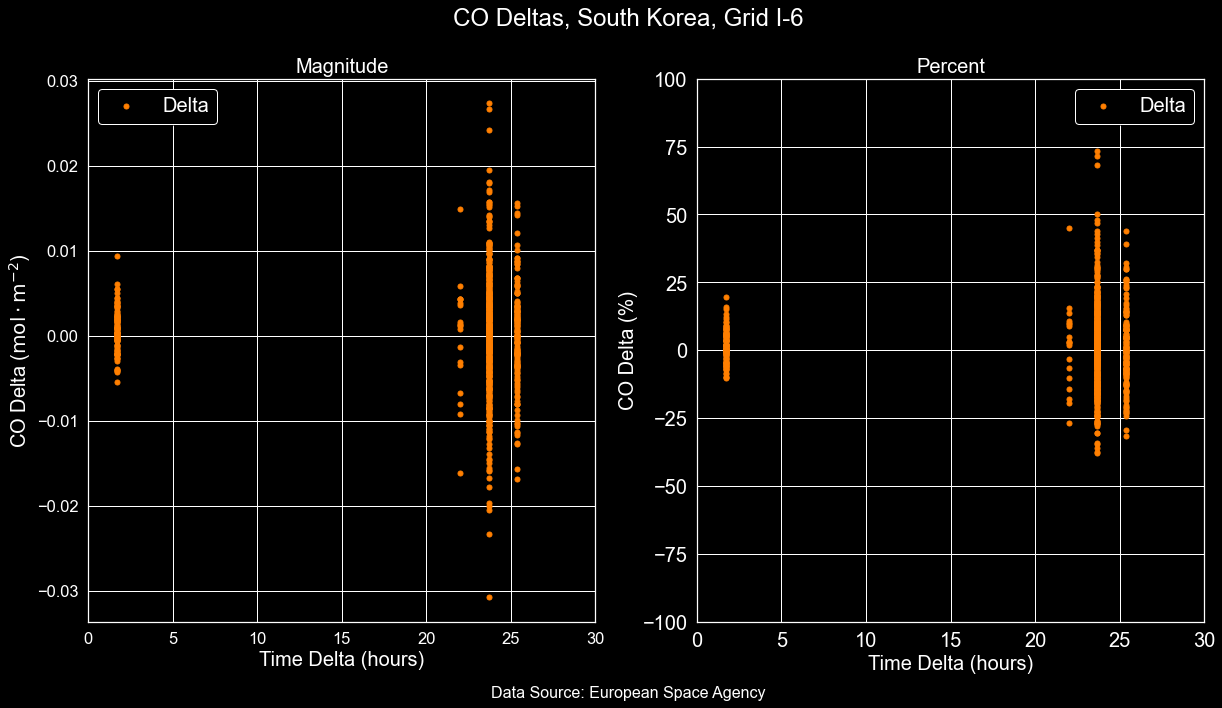

<IPython.core.display.Javascript object>

In [103]:
# Plot deltas
grid_cell = "I-6"
fig, ax = stl.plot_deltas(
    time_delta=time_deltas_i6_arr,
    no2_delta_magnitude=co_deltas_magnitude_i6_arr,
    no2_delta_percent=co_deltas_percent_i6_arr,
    grid_id=grid_cell,
    product_type="CO",
    #     y_min_magnitude=-1,
    #     y_max_magnitude=1,
    #     x_max=5,
    y_min_percent=-100,
    y_max_percent=100,
    y_label_magnitude=r"CO Delta ($\mathrm{mol \cdot m^{-2}}$)",
    y_label_percent="CO Delta (%)",
)

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "time-series",
        "south-korea",
        "carbon-monoxide",
        "deltas",
        f"co-deltas-magnitude-percent-grid-{grid_cell.lower().replace('-', '')}.png",
    )
)

### Rural Area to the East - Low

#### Grid S-9

Saved plot: co-deltas-magnitude-percent-grid-s9.png


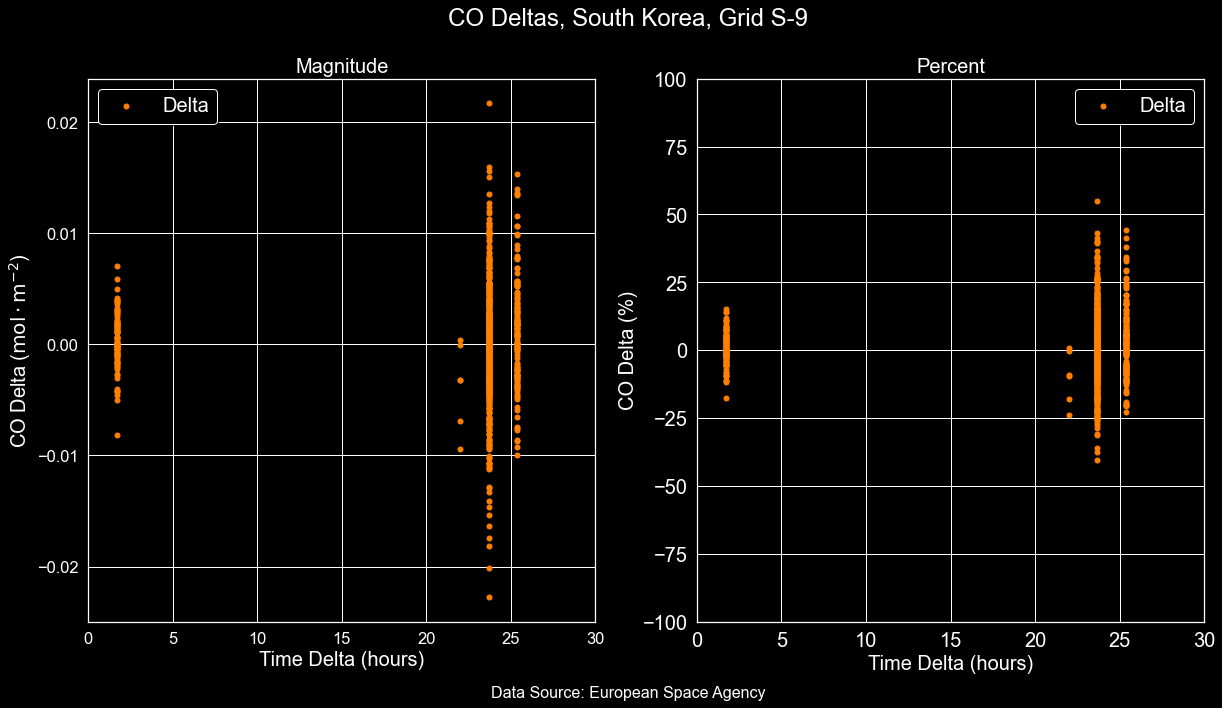

<IPython.core.display.Javascript object>

In [104]:
# Plot deltas
grid_cell = "S-9"
fig, ax = stl.plot_deltas(
    time_delta=time_deltas_s9_arr,
    no2_delta_magnitude=co_deltas_magnitude_s9_arr,
    no2_delta_percent=co_deltas_percent_s9_arr,
    grid_id=grid_cell,
    product_type="CO",
    #     y_min_magnitude=-1,
    #     y_max_magnitude=1,
    #     x_max=5,
    y_min_percent=-100,
    y_max_percent=100,
    y_label_magnitude=r"CO Delta ($\mathrm{mol \cdot m^{-2}}$)",
    y_label_percent="CO Delta (%)",
)

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "time-series",
        "south-korea",
        "carbon-monoxide",
        "deltas",
        f"co-deltas-magnitude-percent-grid-{grid_cell.lower().replace('-', '')}.png",
    )
)

### Southern Coast - High

#### Grid N-17

Saved plot: co-deltas-magnitude-percent-grid-n17.png


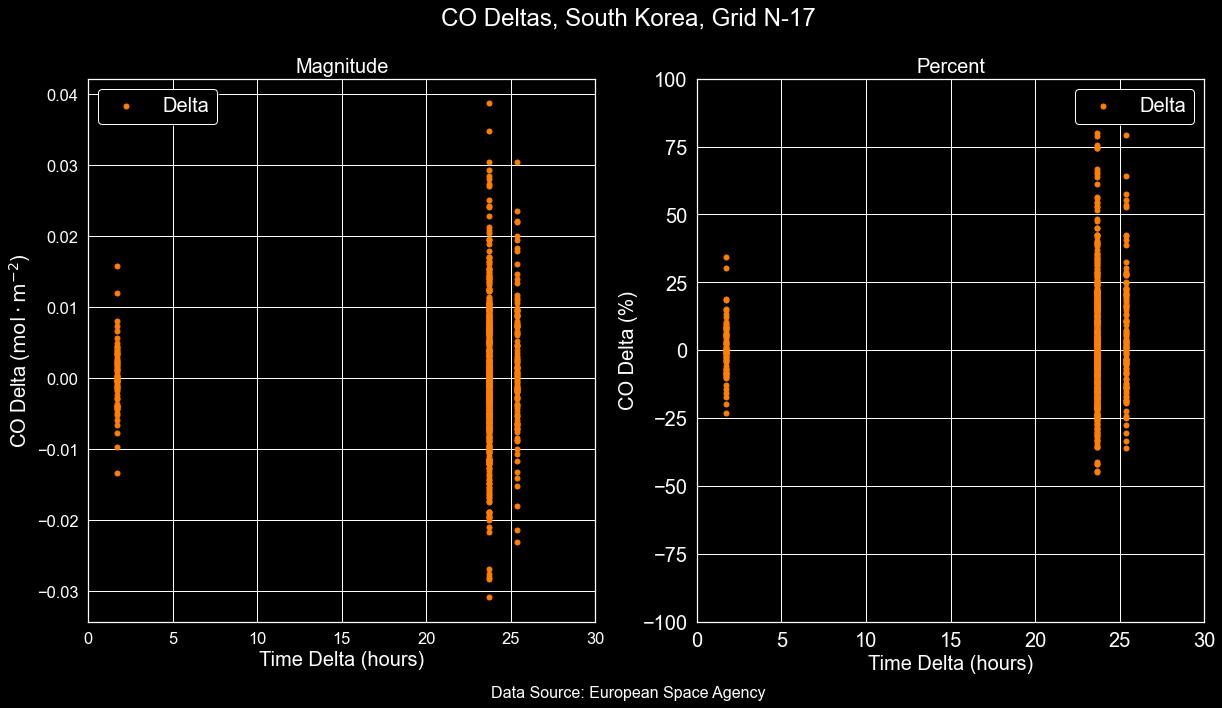

<IPython.core.display.Javascript object>

In [105]:
# Plot deltas
grid_cell = "N-17"
fig, ax = stl.plot_deltas(
    time_delta=time_deltas_n17_arr,
    no2_delta_magnitude=co_deltas_magnitude_n17_arr,
    no2_delta_percent=co_deltas_percent_n17_arr,
    grid_id=grid_cell,
    product_type="CO",
    #     y_min_magnitude=-1,
    #     y_max_magnitude=1,
    #     x_max=5,
    y_min_percent=-100,
    y_max_percent=100,
    y_label_magnitude=r"CO Delta ($\mathrm{mol \cdot m^{-2}}$)",
    y_label_percent="CO Delta (%)",
)

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "time-series",
        "south-korea",
        "carbon-monoxide",
        "deltas",
        f"co-deltas-magnitude-percent-grid-{grid_cell.lower().replace('-', '')}.png",
    )
)

### Rural Area in the Center - Medium/Low

#### Grid N-11

Saved plot: co-deltas-magnitude-percent-grid-n11.png


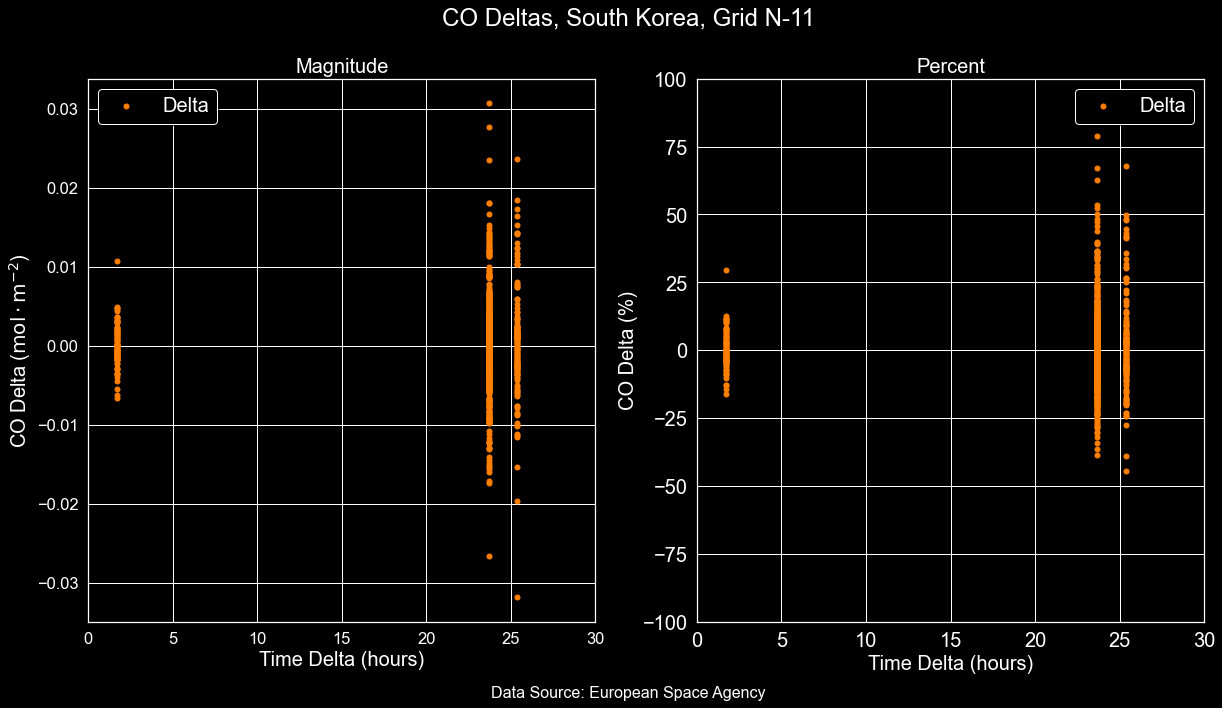

<IPython.core.display.Javascript object>

In [106]:
# Plot deltas
grid_cell = "N-11"
fig, ax = stl.plot_deltas(
    time_delta=time_deltas_n11_arr,
    no2_delta_magnitude=co_deltas_magnitude_n11_arr,
    no2_delta_percent=co_deltas_percent_n11_arr,
    grid_id=grid_cell,
    product_type="CO",
    #     y_min_magnitude=-1,
    #     y_max_magnitude=1,
    #     x_max=5,
    y_min_percent=-100,
    y_max_percent=100,
    y_label_magnitude=r"CO Delta ($\mathrm{mol \cdot m^{-2}}$)",
    y_label_percent="CO Delta (%)",
)

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "time-series",
        "south-korea",
        "carbon-monoxide",
        "deltas",
        f"co-deltas-magnitude-percent-grid-{grid_cell.lower().replace('-', '')}.png",
    )
)

## Standard Deviation vs. Mean Plots

### 2018

#### All Grid Cells

Saved plot: co-stddev-vs-mean-all-grid-cells-2018.png


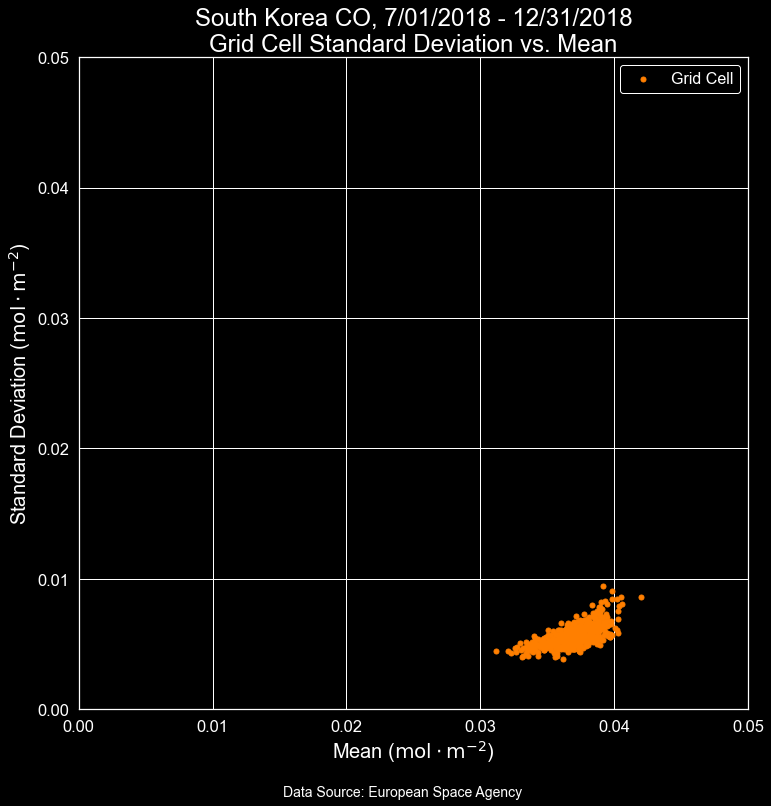

<IPython.core.display.Javascript object>

In [127]:
# Plot CO standard deviation vs mean for all grid cells
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.scatter(
        x=means_2018,
        y=standard_deviations_2018,
        marker="o",
        s=25,
        color="#ff7f00",
        label="Grid Cell",
    )

    # Configure figure, axes, legend, caption
    # Figure
    #     plt.xticks(fontsize=20)
    #     plt.yticks(fontsize=20)

    # Axes
    ax.set_title(
        "South Korea CO, 7/01/2018 - 12/31/2018\n"
        "Grid Cell Standard Deviation vs. Mean",
        fontsize=24,
    )
    ax.set_xlabel(r"Mean ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20)
    ax.set_ylabel(
        r"Standard Deviation ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20
    )
    #     ax.set_xlim(0, round(means.max(), 4))
    #     ax.set_ylim(0, round(means.max(), 4))
    ax.set_xlim(0, 0.05)
    ax.set_ylim(0, 0.05)
    ax.legend(shadow=True, edgecolor="white", fontsize=16, loc="best")
    #     ax.grid(False)

    # Caption
    fig.text(
        0.5,
        0.025,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "statistics",
        "south-korea",
        "carbon-monoxide",
        "co-stddev-vs-mean-all-grid-cells-2018.png",
    )
)

#### Subset Regions

### 2019

#### All Grid Cells

Saved plot: co-stddev-vs-mean-all-grid-cells-2019.png


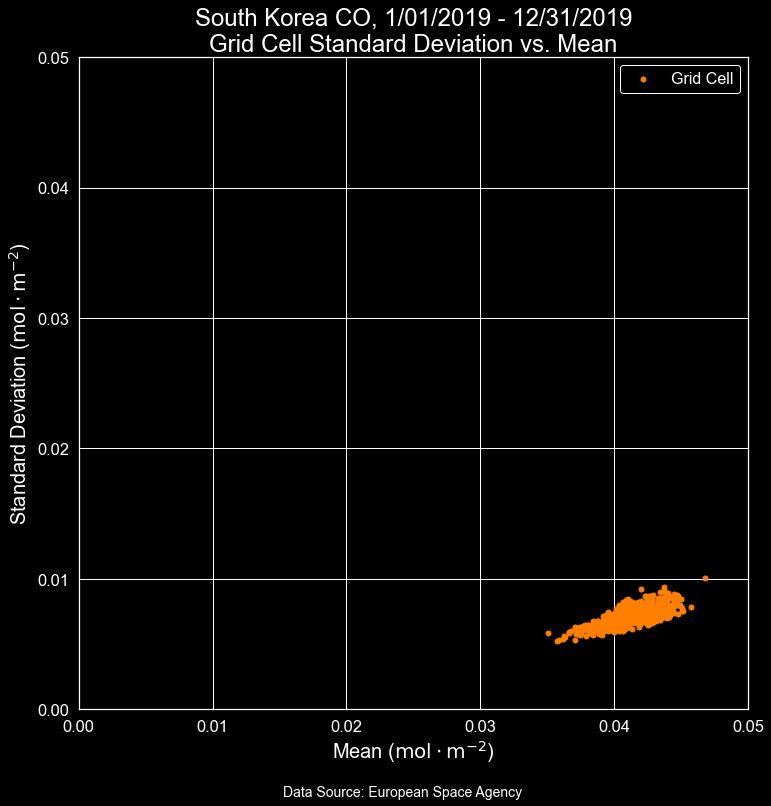

<IPython.core.display.Javascript object>

In [126]:
# Plot NO2 standard deviation vs mean for all grid cells
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.scatter(
        x=means_2019,
        y=standard_deviations_2019,
        marker="o",
        s=25,
        color="#ff7f00",
        label="Grid Cell",
    )

    # Configure figure, axes, legend, caption
    # Figure
    #     plt.xticks(fontsize=20)
    #     plt.yticks(fontsize=20)

    # Axes
    ax.set_title(
        "South Korea CO, 1/01/2019 - 12/31/2019\n"
        "Grid Cell Standard Deviation vs. Mean",
        fontsize=24,
    )
    ax.set_xlabel(r"Mean ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20)
    ax.set_ylabel(
        r"Standard Deviation ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20
    )
    #     ax.set_xlim(0, round(means.max(), 4))
    #     ax.set_ylim(0, round(means.max(), 4))
    ax.set_xlim(0, 0.05)
    ax.set_ylim(0, 0.05)
    ax.legend(shadow=True, edgecolor="white", fontsize=16, loc="best")
    #     ax.grid(False)

    # Caption
    fig.text(
        0.5,
        0.025,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "statistics",
        "south-korea",
        "carbon-monoxide",
        "co-stddev-vs-mean-all-grid-cells-2019.png",
    )
)

#### Subset Regions

### 2020

#### All Grid Cells

Saved plot: co-stddev-vs-mean-all-grid-cells-2020.png


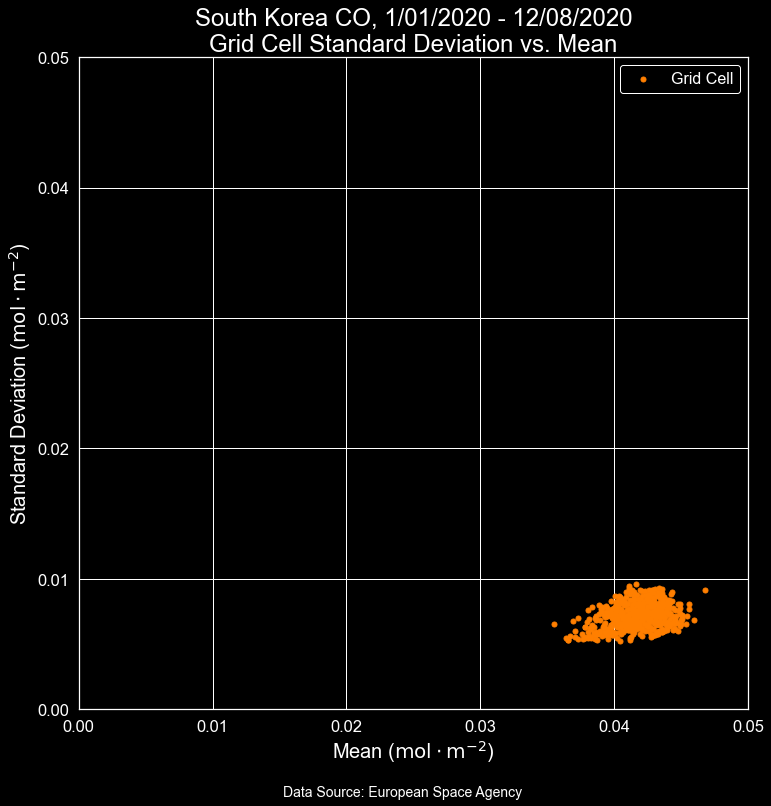

<IPython.core.display.Javascript object>

In [125]:
# Plot NO2 standard deviation vs mean for all grid cells
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.scatter(
        x=means_2020,
        y=standard_deviations_2020,
        marker="o",
        s=25,
        color="#ff7f00",
        label="Grid Cell",
    )

    # Configure figure, axes, legend, caption
    # Figure
    #     plt.xticks(fontsize=20)
    #     plt.yticks(fontsize=20)

    # Axes
    ax.set_title(
        "South Korea CO, 1/01/2020 - 12/08/2020\n"
        "Grid Cell Standard Deviation vs. Mean",
        fontsize=24,
    )
    ax.set_xlabel(r"Mean ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20)
    ax.set_ylabel(
        r"Standard Deviation ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20
    )
    #     ax.set_xlim(0, round(means.max(), 4))
    #     ax.set_ylim(0, round(means.max(), 4))
    ax.set_xlim(0, 0.05)
    ax.set_ylim(0, 0.05)
    ax.legend(shadow=True, edgecolor="white", fontsize=16, loc="best")
    #     ax.grid(False)

    # Caption
    fig.text(
        0.5,
        0.025,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "statistics",
        "south-korea",
        "carbon-monoxide",
        "co-stddev-vs-mean-all-grid-cells-2020.png",
    )
)

#### Subset Regions

### 2018, 2019, 2020

In [115]:
# Linear regression for 2018, 2019, 2020
(
    slope_2018,
    intercept_2018,
    r_value_2018,
    p_value_2018,
    std_err_2018,
) = stats.linregress(means_2018, standard_deviations_2018)

(
    slope_2019,
    intercept_2019,
    r_value_2019,
    p_value_2019,
    std_err_2019,
) = stats.linregress(means_2019, standard_deviations_2019)

(
    slope_2020,
    intercept_2020,
    r_value_2020,
    p_value_2020,
    std_err_2020,
) = stats.linregress(means_2020, standard_deviations_2020)

<IPython.core.display.Javascript object>

In [116]:
# Display regression numbers
print(
    "2018 (7/01 - 12/31)\n"
    f"    Slope:     {slope_2018}\n"
    f"    Intercept: {intercept_2018}\n"
    f"    R-Squared: {r_value_2018**2}\n"
    f"    P-Value:   {p_value_2018}\n"
    f"    Std-Error: {std_err_2018}\n"
    f"    RMSE:      {sqrt(std_err_2018)}\n\n"
    "2019 (1/01 - 12/31)\n"
    f"    Slope:     {slope_2019}\n"
    f"    Intercept: {intercept_2019}\n"
    f"    R-Squared: {r_value_2019**2}\n"
    f"    P-Value:   {p_value_2019}\n"
    f"    Std-Error: {std_err_2019}\n"
    f"    RMSE:      {sqrt(std_err_2019)}\n\n"
    "2020 (1/01 - 11/16)\n"
    f"    Slope:     {slope_2020}\n"
    f"    Intercept: {intercept_2020}\n"
    f"    R-Squared: {r_value_2020**2}\n"
    f"    P-Value:   {p_value_2020}\n"
    f"    Std-Error: {std_err_2020}\n"
    f"    RMSE:      {sqrt(std_err_2020)}\n\n"
)

2018 (7/01 - 12/31)
    Slope:     0.34871590789281093
    Intercept: -0.0072384789603397726
    R-Squared: 0.46640090780970556
    P-Value:   9.76442486055008e-97
    Std-Error: 0.014158585637010807
    RMSE:      0.11898985518526697

2019 (1/01 - 12/31)
    Slope:     0.2983702885677011
    Intercept: -0.005135685892165377
    R-Squared: 0.5564929402149599
    P-Value:   1.2088283273793587e-124
    Std-Error: 0.010111050469740812
    RMSE:      0.10055371932325931

2020 (1/01 - 11/16)
    Slope:     0.1778557435911181
    Intercept: -0.00023061387643247017
    R-Squared: 0.11902886500153387
    P-Value:   6.925935427096697e-21
    Std-Error: 0.01836719567262974
    RMSE:      0.13552562736482623




<IPython.core.display.Javascript object>

Saved plot: co-stddev-vs-mean-all-grid-cells-individual-years.png


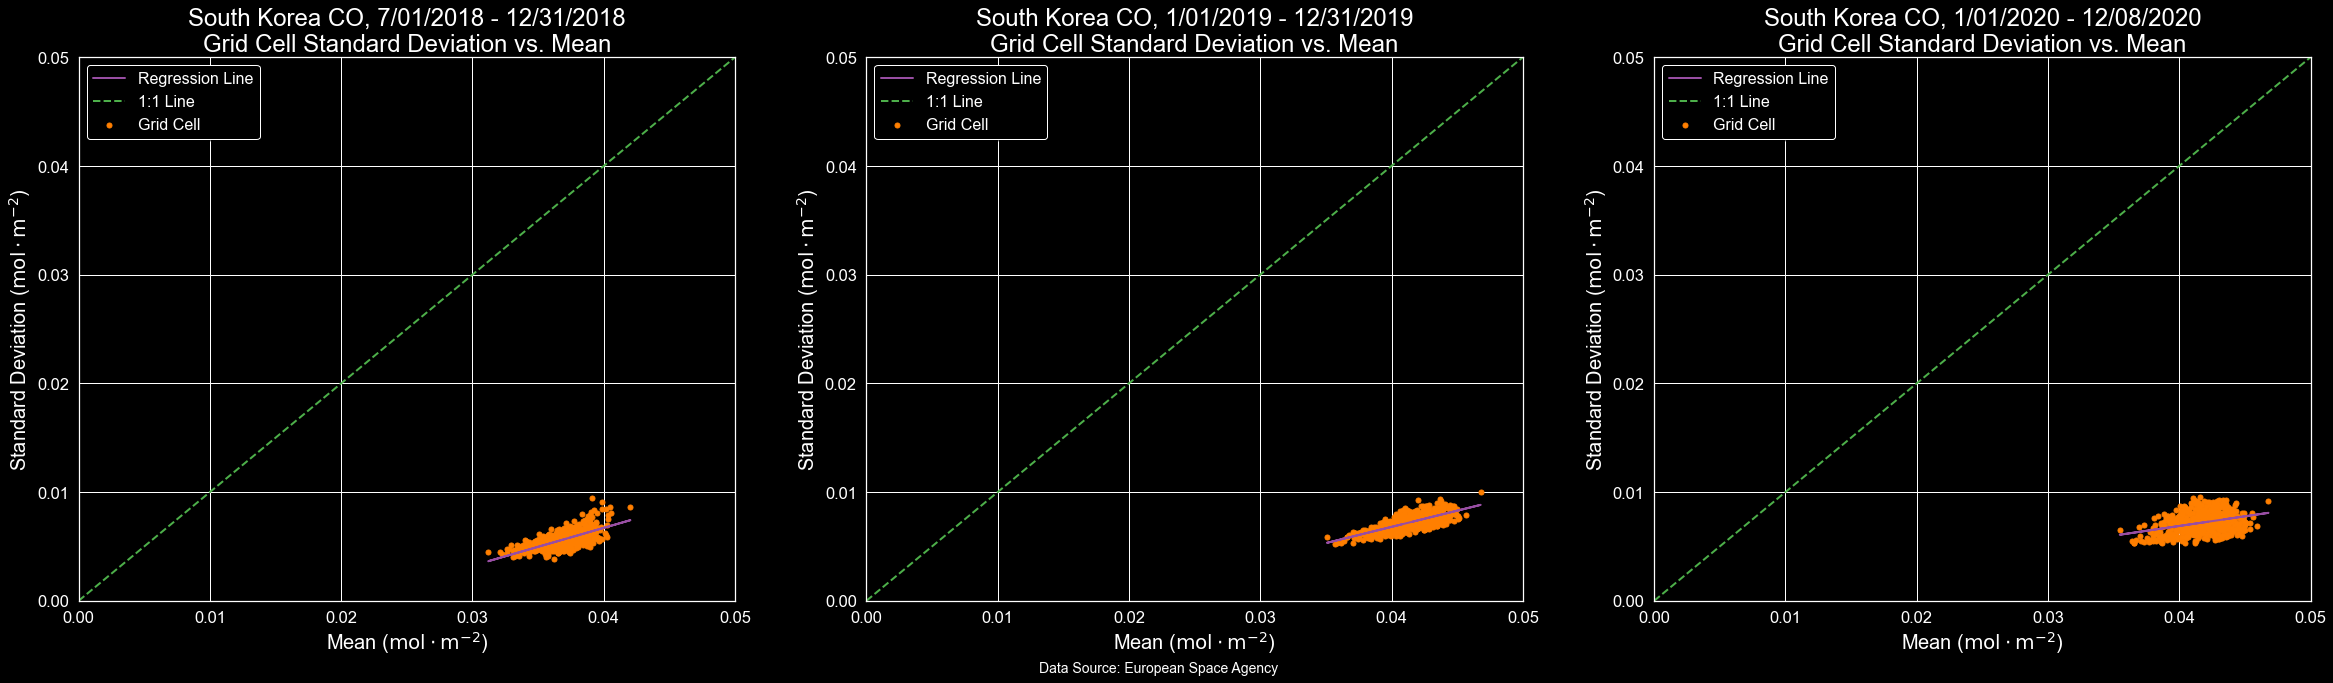

<IPython.core.display.Javascript object>

In [130]:
# Plot CO standard deviation vs mean, with linear regression and 1:1 lines
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))

    # Data
    ax[0].scatter(
        x=means_2018,
        y=standard_deviations_2018,
        marker="o",
        s=25,
        color="#ff7f00",
        label="Grid Cell",
    )

    ax[1].scatter(
        x=means_2019,
        y=standard_deviations_2019,
        marker="o",
        s=25,
        color="#ff7f00",
        label="Grid Cell",
    )

    ax[2].scatter(
        x=means_2020,
        y=standard_deviations_2020,
        marker="o",
        s=25,
        color="#ff7f00",
        label="Grid Cell",
    )

    # Regression lines
    ax[0].plot(
        means_2018,
        intercept_2018 + slope_2018 * means_2018,
        label="Regression Line",
        color="#984ea3",
        linewidth=2,
    )

    ax[1].plot(
        means_2019,
        intercept_2019 + slope_2019 * means_2019,
        label="Regression Line",
        color="#984ea3",
        linewidth=2,
    )

    ax[2].plot(
        means_2020,
        intercept_2020 + slope_2020 * means_2020,
        label="Regression Line",
        color="#984ea3",
        linewidth=2,
    )

    # Configure figure, axes, legend, caption
    # Figure
    #     plt.xticks(fontsize=20)
    #     plt.yticks(fontsize=20)

    dates = [
        "7/01/2018 - 12/31/2018",
        "1/01/2019 - 12/31/2019",
        "1/01/2020 - 12/08/2020",
    ]

    # Axes
    for index, axis in enumerate(fig.axes):
        axis.set_title(
            f"South Korea CO, {dates[index]}\n"
            "Grid Cell Standard Deviation vs. Mean",
            fontsize=24,
        )
        axis.set_xlabel(r"Mean ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20)
        axis.set_ylabel(
            r"Standard Deviation ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20
        )
        #         axis.set_xlim(0, round(means.max(), 4))
        #         axis.set_ylim(0, round(means.max(), 4))
        axis.set_xlim(0, 0.05)
        axis.set_ylim(0, 0.05)
        #     ax.grid(False)
        # 1:1 line
        axis.plot(
            (0, 1),
            (0, 1),
            transform=axis.transAxes,
            ls="--",
            #             c="w",
            #             c="#e41a1c",
            c="#4daf4a",
            #             zorder=0,
            label="1:1 Line",
            linewidth=2,
        )
        axis.legend(shadow=True, edgecolor="white", fontsize=16, loc="best")

    # Caption
    fig.text(
        0.5,
        0.025,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "statistics",
        "south-korea",
        "carbon-monoxide",
        "co-stddev-vs-mean-all-grid-cells-individual-years.png",
    )
)

#### All Grid Cells

### 2018-2020

#### All Grid Cells

Saved plot: co-stddev-vs-mean-all-grid-cells-with-subregions.png


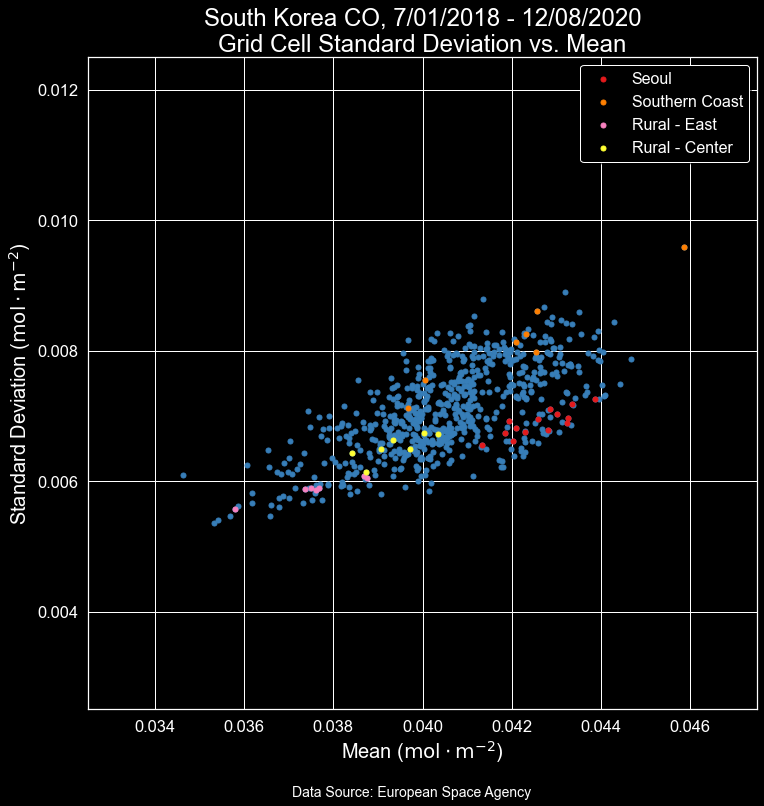

<IPython.core.display.Javascript object>

In [156]:
# Plot CO standard deviation vs mean for all grid cells
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.scatter(
        x=means,
        y=standard_deviations,
        marker="o",
        s=25,
        color="#377eb8",
        #         label="Grid Cell",
    )

    ax.scatter(
        x=means_subset_1,
        y=standard_deviations_subset_1,
        marker="o",
        s=25,
        color="#e41a1c",
        label="Seoul",
    )

    ax.scatter(
        x=means_subset_2,
        y=standard_deviations_subset_2,
        marker="o",
        s=25,
        color="#ff7f00",
        label="Southern Coast",
    )

    ax.scatter(
        x=means_subset_3,
        y=standard_deviations_subset_3,
        marker="o",
        s=25,
        color="#f781bf",
        label="Rural - East",
    )

    ax.scatter(
        x=means_subset_4,
        y=standard_deviations_subset_4,
        marker="o",
        s=25,
        color="#ffff33",
        label="Rural - Center",
    )

    # Configure figure, axes, legend, caption
    # Figure
    #     plt.xticks(fontsize=20)
    #     plt.yticks(fontsize=20)

    # Axes
    ax.set_title(
        "South Korea CO, 7/01/2018 - 12/08/2020\n"
        "Grid Cell Standard Deviation vs. Mean",
        fontsize=24,
    )
    ax.set_xlabel(r"Mean ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20)
    ax.set_ylabel(
        r"Standard Deviation ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20
    )
    #     ax.set_xlim(0, round(means.max(), 4))
    #     ax.set_ylim(0, round(means.max(), 4))
    ax.set_xlim(0.0325, 0.0475)
    ax.set_ylim(0.0025, 0.0125)
    ax.legend(shadow=True, edgecolor="white", fontsize=16, loc="best")
    #     ax.grid(False)

    # Caption
    fig.text(
        0.5,
        0.025,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "statistics",
        "south-korea",
        "carbon-monoxide",
        "co-stddev-vs-mean-all-grid-cells-with-subregions.png",
    )
)

#### Subset Regions

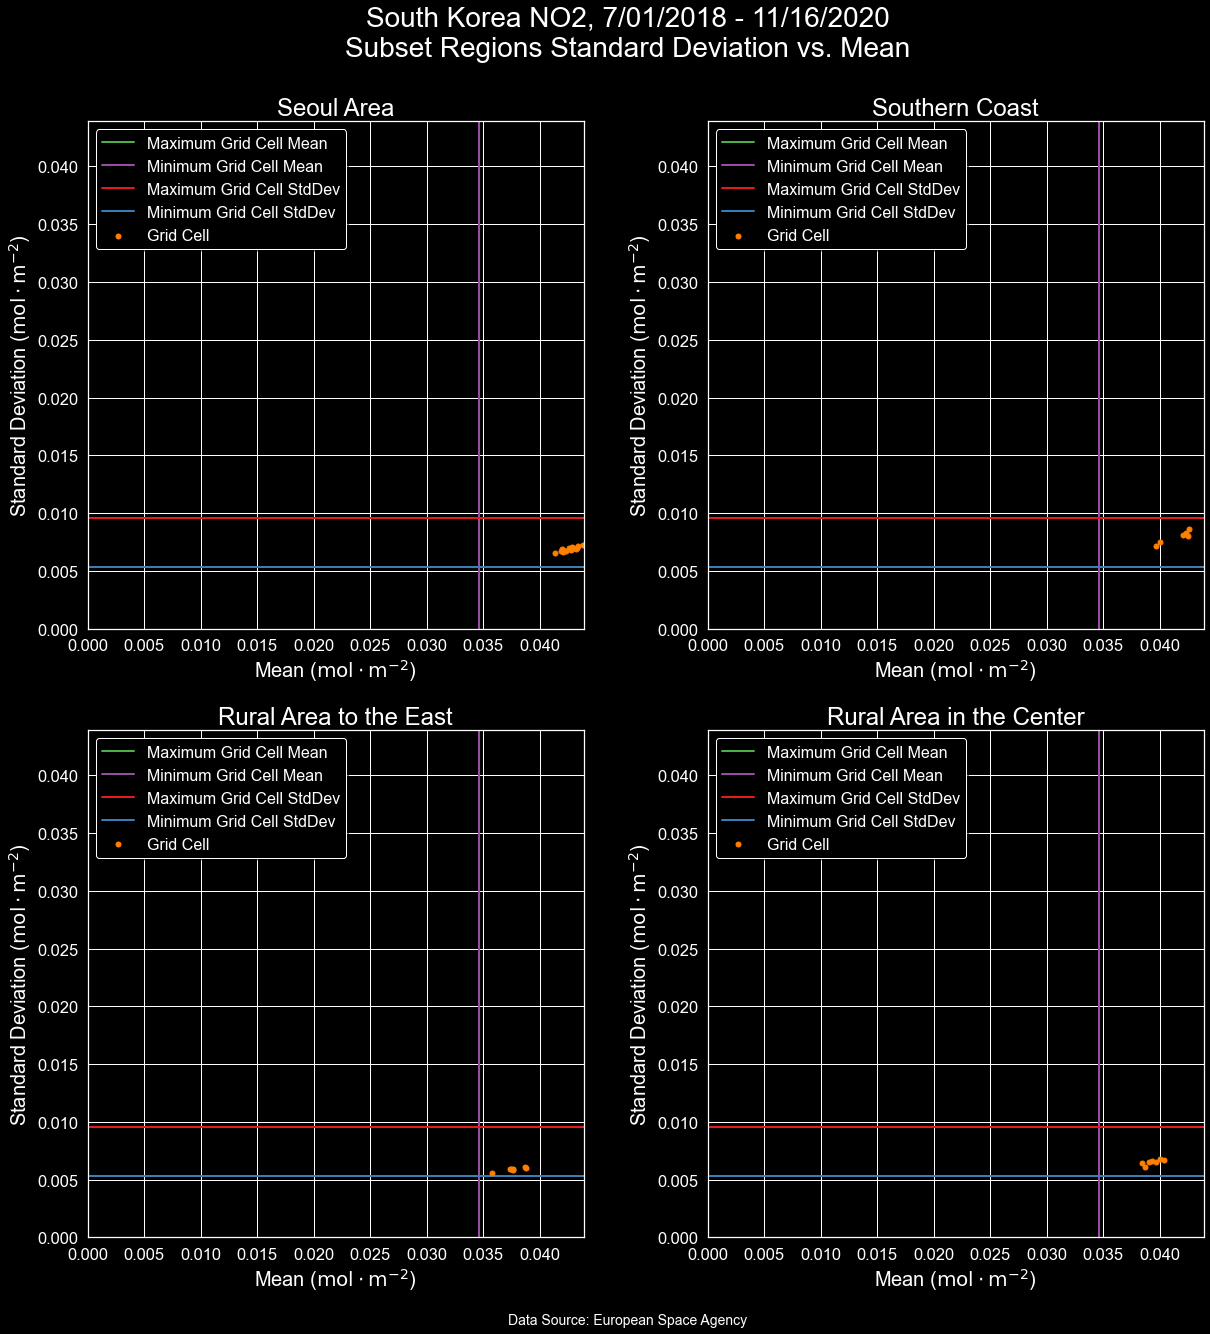

<IPython.core.display.Javascript object>

In [131]:
# Plot CO standard deviation vs mean for subset regions
with plt.style.context("dark_background"):
    # Create plot
    fig, ax = plt.subplots(2, 2, figsize=(20, 20))

    # Figure
    plt.suptitle(
        "South Korea NO2, 7/01/2018 - 11/16/2020\n"
        "Subset Regions Standard Deviation vs. Mean",
        size=28,
    )
    plt.subplots_adjust(wspace=0.25)
    plt.subplots_adjust(top=0.90)
    #     plt.xticks(fontsize=20)
    #     plt.yticks(fontsize=20)

    # Configure axes
    # Subplot x values, y values, and titles
    subplot_means = [
        means_subset_1,
        means_subset_2,
        means_subset_3,
        means_subset_4,
    ]
    subplot_standard_deviations = [
        standard_deviations_subset_1,
        standard_deviations_subset_2,
        standard_deviations_subset_3,
        standard_deviations_subset_4,
    ]
    subplot_titles = [
        "Seoul Area",
        "Southern Coast",
        "Rural Area to the East",
        "Rural Area in the Center",
    ]

    for index, axis in enumerate(fig.axes):
        # Scatter plot
        axis.scatter(
            x=subplot_means[index],
            y=subplot_standard_deviations[index],
            marker="o",
            s=25,
            color="#ff7f00",
            label="Grid Cell",
            zorder=2,
        )
        # Vertical and horizontal lines
        axis.axvline(
            means.max(),
            color="#4daf4a",
            label="Maximum Grid Cell Mean",
            linewidth=2,
            zorder=1,
        )
        axis.axvline(
            means.min(),
            color="#984ea3",
            label="Minimum Grid Cell Mean",
            linewidth=2,
            zorder=1,
        )
        axis.axhline(
            standard_deviations.max(),
            color="#e41a1c",
            label="Maximum Grid Cell StdDev",
            linewidth=2,
            zorder=1,
        )
        axis.axhline(
            standard_deviations.min(),
            color="#377eb8",
            label="Minimum Grid Cell StdDev",
            linewidth=2,
            zorder=1,
        )
        # Axes settings
        axis.set_title(subplot_titles[index], fontsize=24)
        axis.set_xlabel(r"Mean ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20)
        axis.set_ylabel(
            r"Standard Deviation ($\mathrm{mol \cdot m^{-2}}$)", fontsize=20
        )
        axis.set_xlim(0, round(means_subset_1.max(), 4))
        axis.set_ylim(0, round(means_subset_1.max(), 4))
        # Legend
        axis.legend(shadow=True, edgecolor="white", fontsize=16, loc="best")

    # Caption
    fig.text(
        0.5,
        0.065,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

# stl.save_figure(
#     output_path=os.path.join(
#         "04-graphics-outputs",
#         "statistics",
#         "south-korea",
#         "no2-stddev-vs-mean-subset-regions.png",
#     )
# )